In [7]:
import csv
with open('eq.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    per=20
    spamwriter.writerow(['a','v','Time'])
    for i in range(int(len(xs_noreg)/per)):
        s=['1','0',str(int(i))]
        spamwriter.writerow(s)

NameError: name 'xs_noreg' is not defined

In [8]:
import csv
with open('reg.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    per=20
    spamwriter.writerow(['a','v','Time'])
    for i in range(int(len(xs_noreg)/per)):
        s=["{:.5f}".format(xs_reg[i*per]),format("{:.5f}".format(ys_reg[i*per])),str(int(i))]
        spamwriter.writerow(s)

NameError: name 'xs_noreg' is not defined

In [9]:
import csv
with open('noreg.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    per=20
    spamwriter.writerow(['a','v','Time'])
    for i in range(int(len(xs_reg)/per)):
        s=["{:.5f}".format(xs_noreg[i*per]),format("{:.5f}".format(ys_noreg[i*per])),str(int(i))]
        spamwriter.writerow(s)

NameError: name 'xs_reg' is not defined

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import autograd.numpy as np 
from autograd import grad  

def sigmoid(x):
    return ( 1/(1 + np.exp(-x)) )

In [11]:
def objective_noreg(A, mean_xs, zs, activation):
    term_1=mean_xs
    term_2=np.sum(np.maximum(activation(np.dot(A,zs.T)).T,0),axis=0)/len(zs)
    term_3 =  term_2 - term_1 
    return term_3

In [12]:
def objective_reg(A, mean_xs, zs, activation):
    term_1=mean_xs
    term_2=np.sum(np.maximum(activation(np.dot(A,zs.T)).T,0),axis=0)/len(zs)
    term_3 =  term_2 - term_1 
    return np.inner(term_3, term_3)/2

In [13]:
def experiment(n,d,k,A_star,T, activation = lambda x:x):
    z_true = np.random.normal(size=(10*n,k))
    xs = activation(np.dot(A_star,z_true.T)).T
    mean_xs = np.sum(np.maximum(xs,0),axis=0) /len(xs) 
       
    A0 = np.random.rand(d,k)  
    V0 = np.random.rand(d)
    eta_A = 0.001
    eta_V = 0.0001
    eta = eta_A
        
    A_noreg = 0*A0
    V_noreg = 0.0*V0
    A_reg = A_noreg.copy()
    iterates_noreg = []#[(A_noreg.item(),V_noreg.item())]
    iterates_reg = []
    for t in range(T):
        z_sampled = np.random.normal(size=(n*4,k)) 
        my_f = lambda A : objective_noreg(A,  mean_xs, z_sampled, activation)
        V_noreg =  V_noreg + eta_V * my_f(A_noreg)
        for i in range(len(V_noreg)):
            my_fi = lambda A : my_f(A)[i]
            A_noreg = A_noreg-eta_A*V_noreg[i]* grad(my_fi)(A_noreg)
        if t % 10 == 0 : iterates_noreg.append((A_noreg.item(),V_noreg.item())) 
            
        my_f = lambda A : (objective_reg(A, mean_xs, z_sampled,activation))
        A_reg = A_reg-eta * grad(my_f)(A_reg)
        if t % 10 == 0 :iterates_reg.append((A_reg.item(),np.sqrt(2*my_f(A_reg))))
            
    return A_noreg, V_noreg, iterates_noreg, A_reg, iterates_reg


In [33]:
d = 1
n = 10000
k = 1

np.random.seed(0)

#d=k= easy example
#A_star= np.eye(k)
#A_star=random_matrix(d,k)
A_star= np.array([[1]], dtype = np.float64).T


for T in [500000]:
    A_noreg, V_noreg, iterates_noreg, A_reg, iterates_reg = experiment(n, d, k, A_star, T)

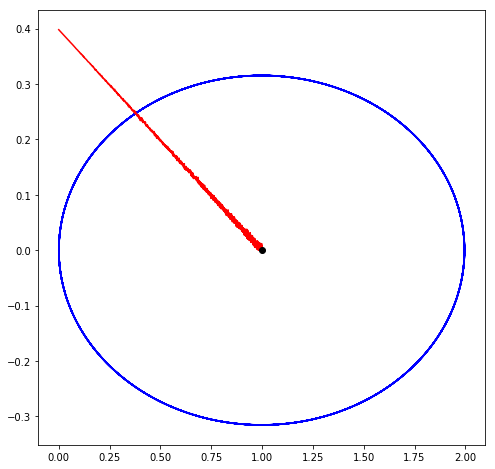

In [36]:
f = plt.figure(figsize=(8,8))

xs_noreg,ys_noreg=[],[]
for v in iterates_noreg[:]:
    xs_noreg.append(v[0])
    ys_noreg.append(v[1])
plt.plot(xs_noreg,ys_noreg,'-',color="blue")

xs_reg,ys_reg=[],[]
for v in iterates_reg[:]:
    xs_reg.append(v[0])
    ys_reg.append(v[1])
plt.plot(xs_reg,ys_reg,'-',color="red")
plt.plot([1],[0],'o',color="black")


#plt.xlim([-.5,2])
#plt.ylim([-.012,.012])
plt.show()

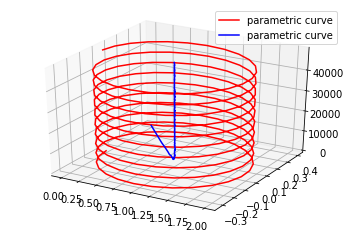

In [37]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
zs = np.linspace(0, len(xs_noreg), len(xs_noreg))
ax.plot(xs_noreg[0::200], ys_noreg[0::200], zs[0::200],color='red', label='parametric curve')
ax.plot(xs_reg[0::200], ys_reg[0::200], zs[0::200],color='blue', label='parametric curve')

ax.legend()

plt.show()

In [38]:
reg=np.array([[xs_reg[i],ys_reg[i],i] for i in range(len(xs_noreg))])
noreg=np.array([[xs_noreg[i],ys_noreg[i],i] for i in range(len(xs_noreg))])
eq=np.array([[1,0,i] for i in range(len(xs_noreg))])

import pandas as pd
df_reg=pd.DataFrame(reg,columns=['a','v','Time'])
df_noreg=pd.DataFrame(noreg,columns=['a','v','Time'])
df_eq=pd.DataFrame(eq,columns=['a','v','Time'])

import plotly.express as px
import plotly.express as px
fig = px.line_3d(df_noreg,x='a',y='v',z='Time')
fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0),
)
fig.show()
fig.write_image("plotly.svg")